In [28]:
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from IPython.display import display, Math



In [5]:
with MPRester("OhzYzXS8KZ2GAhVz3g1zkqH8EJz32Y7X") as m:
    # Récupération de la structure du cristal KScO2
    struc = m.get_phonon_bandstructure_by_material_id("mp-8188")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bandes des phonons et zone de Brillouin

On commence par représenter la structure de bande des phonons ainsi que la zone de Brillouin

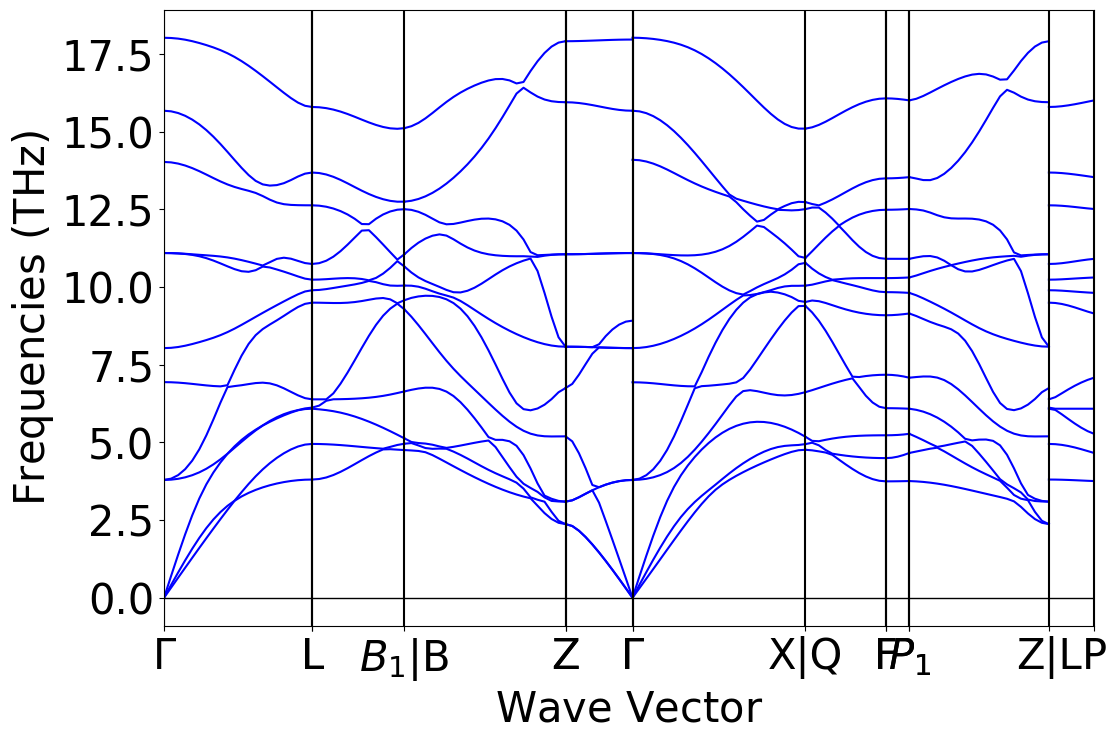

In [7]:
ph_bstruc = PhononBSPlotter(struc)
ph_bstruc.show()

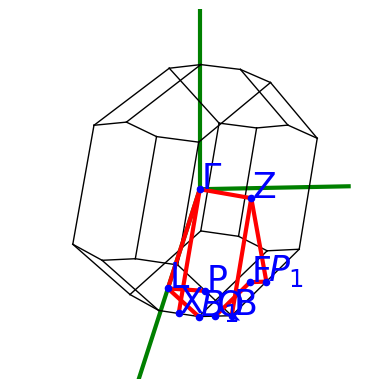

In [8]:
fig = ph_bstruc.plot_brillouin()

# Branches acoustiques

Maintenant nous allons déterminer les 3 branches acoustiques que nous allons sélectionner. Ce sont celles dont la fréquence est nulle en $\Gamma$. On les identifie facilement en couleur sur la structure ci-dessous. 

En ce qui concerne les 3 directions que nous allons choisir, nous allons naturellement prendre les directions $\Gamma - L$, $Z - \Gamma$ et $\Gamma - X|Q$, car les branches acoustiques ont un comportement linéaire autour de $\Gamma$, l'origine de notre zone de Brillouin. 

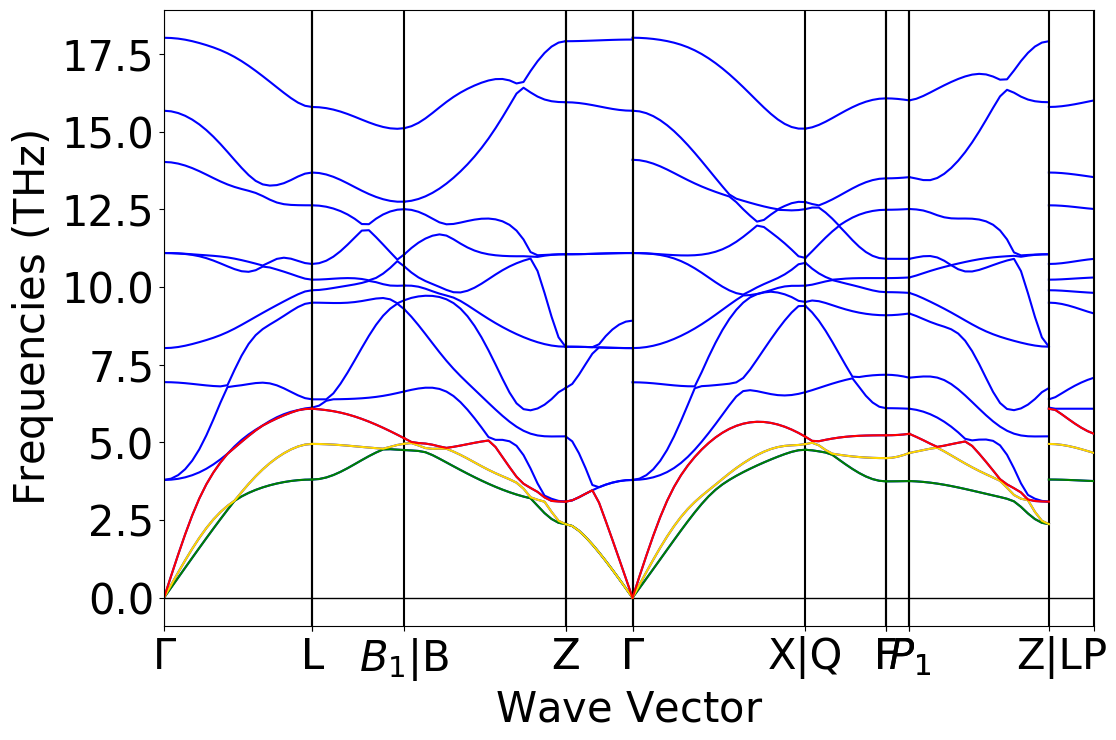

In [12]:

ph_data = ph_bstruc.bs_plot_data()

dist = ph_data['distances']
freq = ph_data['frequency']

ph_bstruc_plot = ph_bstruc.get_plot()

for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], color = 'green')
    plt.plot(dist[i], freq[i][1], color = 'gold')
    plt.plot(dist[i], freq[i][2], color = 'red')

# Vitesse du son

Dans un solide, la vitesse de propagation du son correspond à la propagation d'un phonon dans le réseau réciproque (et donc dans la zone de Brillouin). Cette vitesse est anisotrope, donc nous pouvons nous attendre à voir des vitesses fort diférentes dans les différentes directions. 

Soit $q$ notre vecteur d'onde et $\omega$ la relation de dispersion du matériau, la vitesse du son est déterminée comme $v_s = \frac{\delta \omega}{\delta q}$ si l'on considère que nous sommes dans le cas de grandes longueur d'ondes ($\lambda$ >> a), car cette relation est alors approximativement linéaire.

Pour obtenir la vitesse du son pour les 3 branches acoustiques dans les directions choisies, il nous suffit alors de calculer la pente de la tangente à ces 3 branches selon la direction choisie pour une fréquence nulle.

Il faut toutefois faire attention aux unités, en effet les fréquences sont données en THz sur le diagramme, mais nous voulons une fréquence angulaire. Il faut donc multiplier par $2\pi$. De plus, les vecteurs d'ondes sont actuellement en $Angström^{-1}$, mais nous voulons une vitesse en [m/s], donc il faudra diviser par $10^{-10}$. 

Voici pour commencer une représentation des tangentes qui nous permettront de calculer les vitesses.

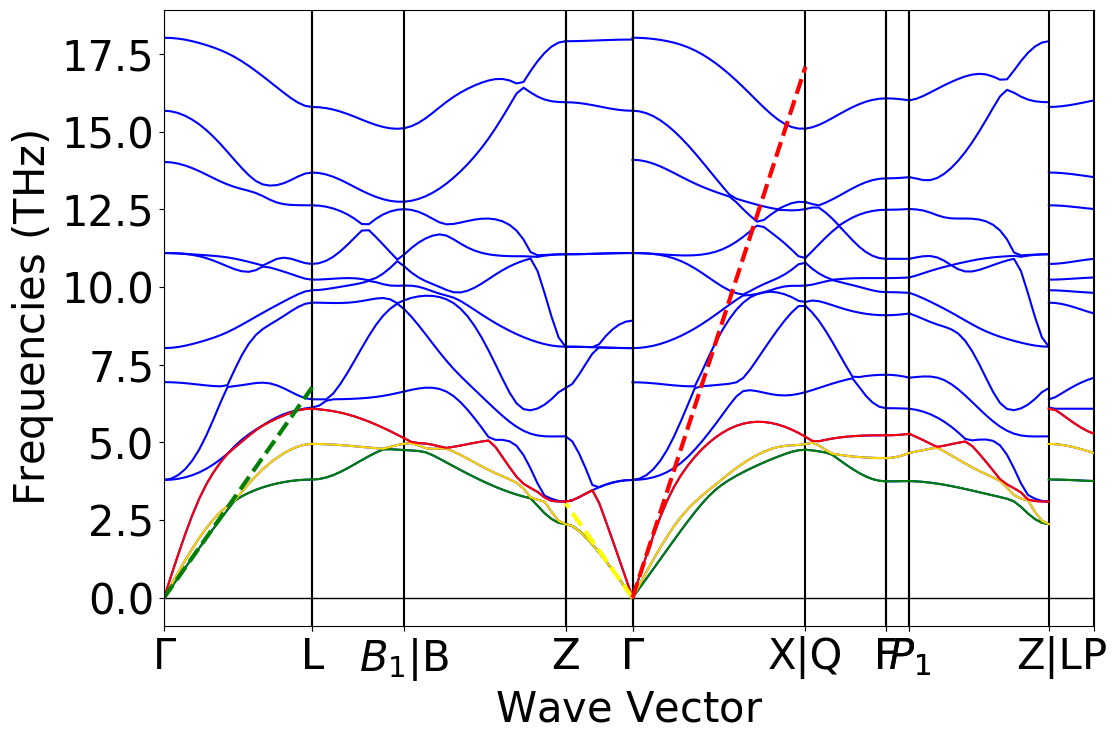

In [42]:
ph_bstruc_plot = ph_bstruc.get_plot()

for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], color = 'green')
    plt.plot(dist[i], freq[i][1], color = 'gold')
    plt.plot(dist[i], freq[i][2], color = 'red')
    
plt.plot([dist[0][0], dist[0][-1]], 
         [0,vs_green/(2*np.pi*THz*A)*(dist[0][-1]-dist[0][0])], 
         '--', color="green",lw=3)

plt.plot([dist[3][-1], dist[3][0]], 
         [0,vs_yell/(2*np.pi*THz*A)*(dist[3][-1]-dist[3][0])], 
         '--', color="yellow",lw=3)

plt.plot([dist[4][0], dist[4][-1]], 
         [0,vs_red/(2*np.pi*THz*A)*(dist[4][-1]-dist[4][0])], 
         '--', color="red",lw=3)

plt.show()



Et maintenant nous pouvons calculer les 3 vitesses dans les 3 directions.

### 1) Première branche acoustique (verte)

In [16]:
A = 1e-10  # pour passer de Ångström à mètre
THz = 1e12 # pour passer de THz à Hz

In [34]:
f_green = freq[0][0]
dw_green = (f_green[1] - f_green[0]) * THz
dq_green = (dist[0][1]-dist[0][0])/A

pente_green = dw_green/dq_green

vs_green = 2*np.pi*np.abs(pente_green) 
display(Math(r"La\ vitesse\ de\ propagation\ du\ son\ pour\ la\ première\ bande\ acoustique\ dans\ la\ direction\ \Gamma - X\ vaut\ " + str(vs_green) + "\ m/s."))

<IPython.core.display.Math object>

### 2) Seconde branche acoustique (jaune)

In [32]:
f_yell = freq[3][1]
dw_yell = (f_yell[-1] - f_yell[-2]) * THz
dq_yell = (dist[3][-1]-dist[3][-2])/A

pente_yell = dw_yell/dq_yell

vs_yell = 2*np.pi*np.abs(pente_yell) 
display(Math(r"La\ vitesse\ de\ propagation\ du\ son\ pour\ la\ seconde\ bande\ acoustique\ dans\ la\ direction\ Z -\Gamma \ vaut\ " + str(vs_yell) + "\ m/s."))

<IPython.core.display.Math object>

### 3) Troisième branche acoustique (rouge)

In [36]:
f_red = freq[4][2]
dw_red = (f_red[1] - f_red[0]) * THz
dq_red = (dist[4][1]-dist[4][0])/A

pente_red = dw_red/dq_red

vs_red = 2*np.pi*np.abs(pente_red) 
display(Math(r"La\ vitesse\ de\ propagation\ du\ son\ pour\ la\ première\ bande\ acoustique\ dans\ la\ direction\ \Gamma - X|Q\ vaut\ " + str(vs_red) + "\ m/s."))

<IPython.core.display.Math object>